In [2]:
!pip install face_recognition

  Obtaining dependency information for face_recognition from https://files.pythonhosted.org/packages/1e/95/f6c9330f54ab07bfa032bf3715c12455a381083125d8880c43cbe76bb3d0/face_recognition-1.3.0-py2.py3-none-any.whl.metadata
  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
  Using cached dlib-19.24.6.tar.gz (3.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Created wheel for dlib: filename=dlib-19.24.6-cp311-cp311-win_amd64.whl size=2871842 sha256=4ea7f8ce447c22c0cc634b797b7fcfc8f3f26bffa022f47957db23acc9ef4824
  Stored in directory: c:\users\marya\appdata\local\pip\cache\wheels\fe\c7\1f\c778b9f7cc6d8d0da4f6697f619f9eb5a49d54d2a2c8267f3c
Successfully built dlib


In [3]:
import cv2
import face_recognition

In [5]:
known_image_1 = face_recognition.load_image_file(r"C:\Users\Marya\PycharmProjects\project1forAI\mark.jpg")
known_image_2 = face_recognition.load_image_file(r"C:\Users\Marya\PycharmProjects\project1forAI\mask.jpg")

In [6]:
known_encoding_1 = face_recognition.face_encodings(known_image_1)[0]
known_encoding_2 = face_recognition.face_encodings(known_image_2)[0]

In [7]:
known_encodings = [known_encoding_1, known_encoding_2]
known_names = ["Mark", "ElonMask"]

In [10]:
image_to_check = face_recognition.load_image_file(r"C:\Users\Marya\PycharmProjects\project1forAI\markandmask.jpg")

In [11]:
# Find all face locations and their encodings in the image
face_locations = face_recognition.face_locations(image_to_check)
face_encodings = face_recognition.face_encodings(image_to_check, face_locations)

In [12]:
# Convert image to BGR color for OpenCV
image_to_check = cv2.cvtColor(image_to_check, cv2.COLOR_RGB2BGR)

In [13]:
# Iterate through each detected face
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # Compare the detected face encoding with the known encodings
    matches = face_recognition.compare_faces(known_encodings, face_encoding)

    name = "Unknown"

    # Find the known face with the smallest distance
    face_distances = face_recognition.face_distance(known_encodings, face_encoding)
    best_match_index = face_distances.argmin()

    if matches[best_match_index]:
        name = known_names[best_match_index]

    # Draw a rectangle around the face
    cv2.rectangle(image_to_check, (left, top), (right, bottom), (0, 0, 255), 2)

    # Draw a label with a name below the face
    cv2.rectangle(image_to_check, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
    cv2.putText(image_to_check, name, (left + 6, bottom - 6), cv2.FONT_HERSHEY_DUPLEX, 1.0, (255, 255, 255), 1)

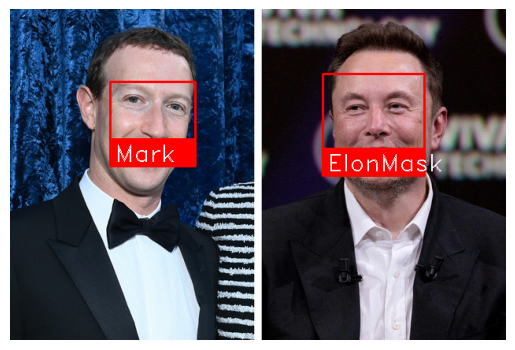

In [17]:
# Display the image with the detected and recognized faces
import matplotlib.pyplot as plt

# Convert the image back to RGB (since OpenCV uses BGR by default)
image_to_check_rgb = cv2.cvtColor(image_to_check, cv2.COLOR_BGR2RGB)

# Display the image with matplotlib
plt.imshow(image_to_check_rgb)
plt.axis('off')  # Hide axes
plt.show()